In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from ipydatagrid import DataGrid
from shapely.geometry import Polygon

### transformation en parquet

In [ ]:
bornes = pd.read_csv('data/borne_de_recharge.csv')

In [ ]:
bornes.to_parquet('data/bornes.parquet.gzip', compression='gzip')

### Premières explorations

In [ ]:
bornes = pd.read_parquet('data/bornes.parquet.gzip')

In [ ]:
#DataGrid(bornes)

#### Rajout du département

In [ ]:
bornes['departement'] = bornes.code_insee_commune.str.slice(0,2)

In [ ]:
bornes = stations = gpd.GeoDataFrame(bornes, geometry=gpd.points_from_xy(bornes.consolidated_longitude, bornes.consolidated_latitude), crs='epsg:4326')
bornes = bornes.to_crs('epsg:2154')

In [ ]:
bornes.explore()

### Un peu de carto

Les zones blanches

In [173]:
size = 20000

In [174]:
bornes_buffer = bornes.buffer(size).unary_union

In [175]:
zones_blanches = gpd.GeoDataFrame(geometry=gpd.GeoSeries(bornes_buffer).explode(index_parts=True), crs='epsg:2154')

<AxesSubplot:>

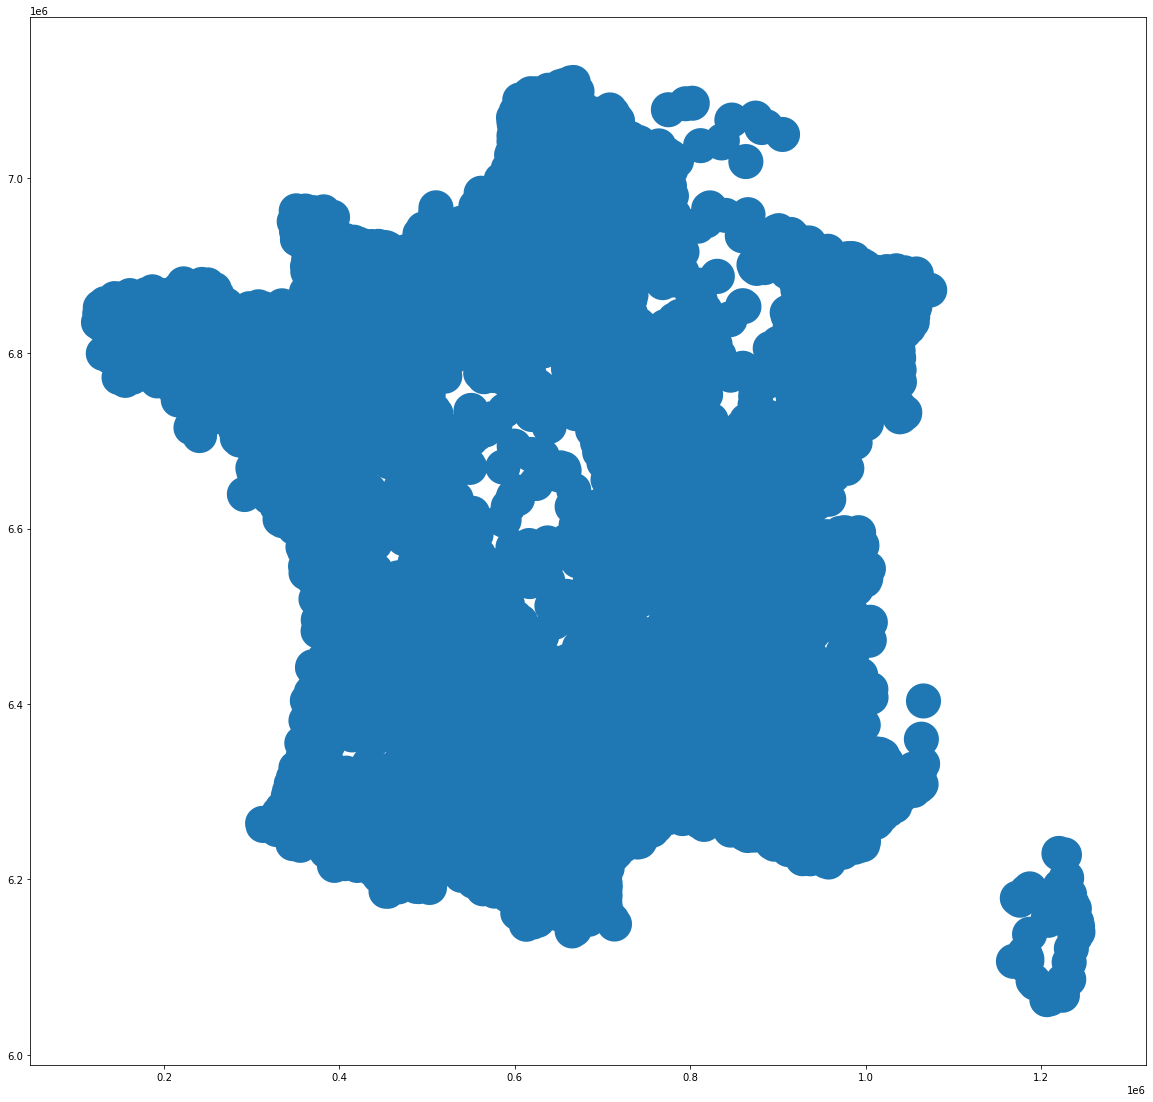

In [178]:
zones_blanches.cx[57313.330064:1318705.112211,5981358.013606:7187658.146073].plot(figsize=(20,20))

### Carroyage de l'info

In [ ]:
side = 20000

In [ ]:
bornes['x'] = np.floor(bornes.geometry.x / side) * side
bornes['y'] = np.floor(bornes.geometry.y / side) * side

In [ ]:
agg = bornes.groupby(['x', 'y'], as_index=False)['nbre_pdc'].sum()

In [ ]:
geometry = [ Polygon ([(x, y),
                       (x + side, y),
                       (x + side , y + side ),
                       (x, y + side )]) for x,y in zip( agg.x, agg.y)]

In [ ]:
agg = gpd.GeoDataFrame(agg, geometry=geometry)

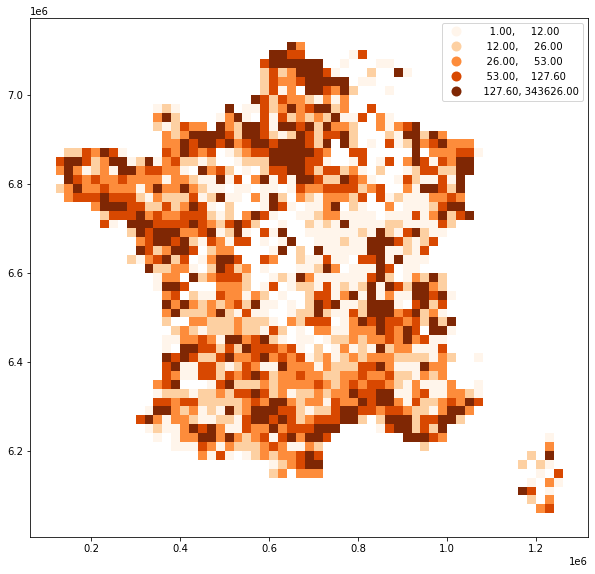

In [171]:
ax = agg.cx[57313.330064:1318705.112211,5981358.013606:7187658.146073].plot('nbre_pdc', scheme='quantiles', figsize=(10,10), cmap='Oranges', legend=True)

### Calcul de la bornes la plus proches